In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


In [2]:
from sklearn.datasets import make_regression
X,Y = make_regression(n_features=1, noise=10, n_samples=1000)

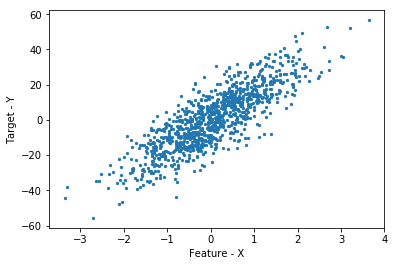

In [3]:
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.scatter(X,Y,s=5)

In [4]:
lr = LinearRegression()
lr.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
lr.coef_


array([14.39540423])

In [6]:
lr.intercept_


0.07617175303729984

In [7]:
pred = lr.predict(X)


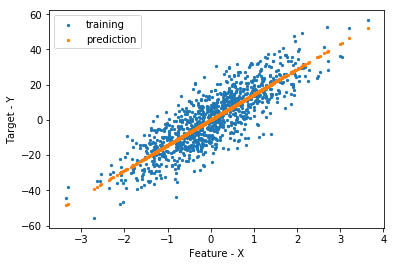

In [8]:
plt.scatter(X,Y,s=5, label='training')
plt.scatter(X,pred,s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()

In [9]:
#Ridge Regression¶
#Ridge Regression imposes penalty on size of coef.
#Less impacted by outliers.
ridge = Ridge(alpha=.1)
lr = LinearRegression()
ridge.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])
lr.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
ridge.coef_


array([0.44186047, 0.44186047])

In [11]:
lr.coef_


array([0.475, 0.475])

In [12]:
outliers = Y[950:] - 600


In [13]:
Y_Out = np.append(Y[:950],outliers)

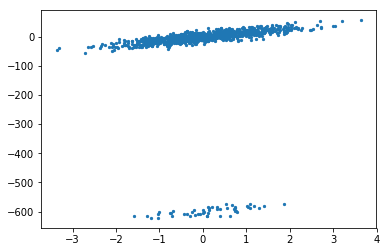

In [14]:
plt.scatter(X,Y_Out, s=5)


In [15]:
lr = LinearRegression()
lr.fit(X,Y_Out)
pred_Out = lr.predict(X)



Text(0.5, 1.0, 'Linear Regression')

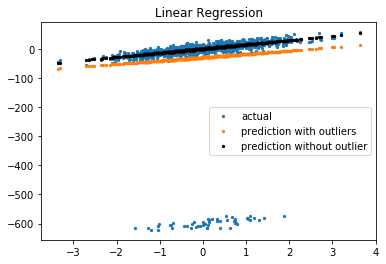

In [16]:
plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5,label='prediction with outliers')
plt.scatter(X,pred,s=5,c='k', label='prediction without outlier')
plt.legend()
plt.title('Linear Regression')

In [20]:
lr.coef_

Y_Out.shape

(1000,)

In [23]:
#ridge

ridge = Ridge(alpha=1000)

ridge.fit(X,Y_Out)

pred_ridge = ridge.predict(X)



Text(0.5, 1.0, 'Linear Regression')

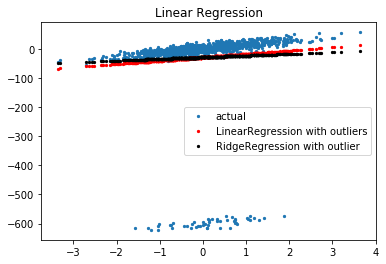

In [24]:
plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5, c='r' ,label='LinearRegression with outliers')
plt.scatter(X,pred_ridge,s=5,c='k', label='RidgeRegression with outlier')
plt.legend()
plt.title('Linear Regression')

In [25]:
ridge.coef_, lr.coef_



(array([5.66462662]), array([11.38564901]))

In [26]:
X, y, w = make_regression(n_samples=10, n_features=10, coef=True,
                          random_state=1, bias=3.5)

In [27]:
w

array([80.71051956, 10.74941291, 38.78606441, 13.64552257,  5.99176895,
       86.35418546, 12.13434557,  4.45518785, 74.71216427, 55.6240234 ])

In [28]:
alphas = np.logspace(-6, 6, 200)
alphas[:20]
#np.logspace(2.0, 3.0, num=4)

array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05])

In [30]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

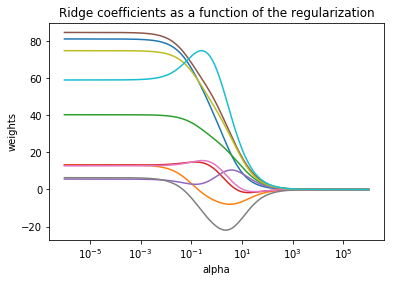

In [31]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

In [32]:
#As alpha tends toward zero the coefficients found by Ridge regression 
#stabilize towards the randomly sampled vector w (similar to LinearRegression).
#For big alpha (strong regularisation) the coefficients are smaller (eventually converging at 0) 
#leading to a simpler and biased solution.

In [33]:
#Lasso 
lasso = Lasso(alpha=.1)
lasso.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
lasso.coef_
#Elastic Net 

array([0.5, 0. ])

In [35]:

en = ElasticNet(alpha=.1)
en.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])



ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
en.coef_


array([0.32589556, 0.32579954])